# Load dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("path_to_3_stages_df.csv")


# Correlation Analysis

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['3_stages'])  # Extract features excluding the label column

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

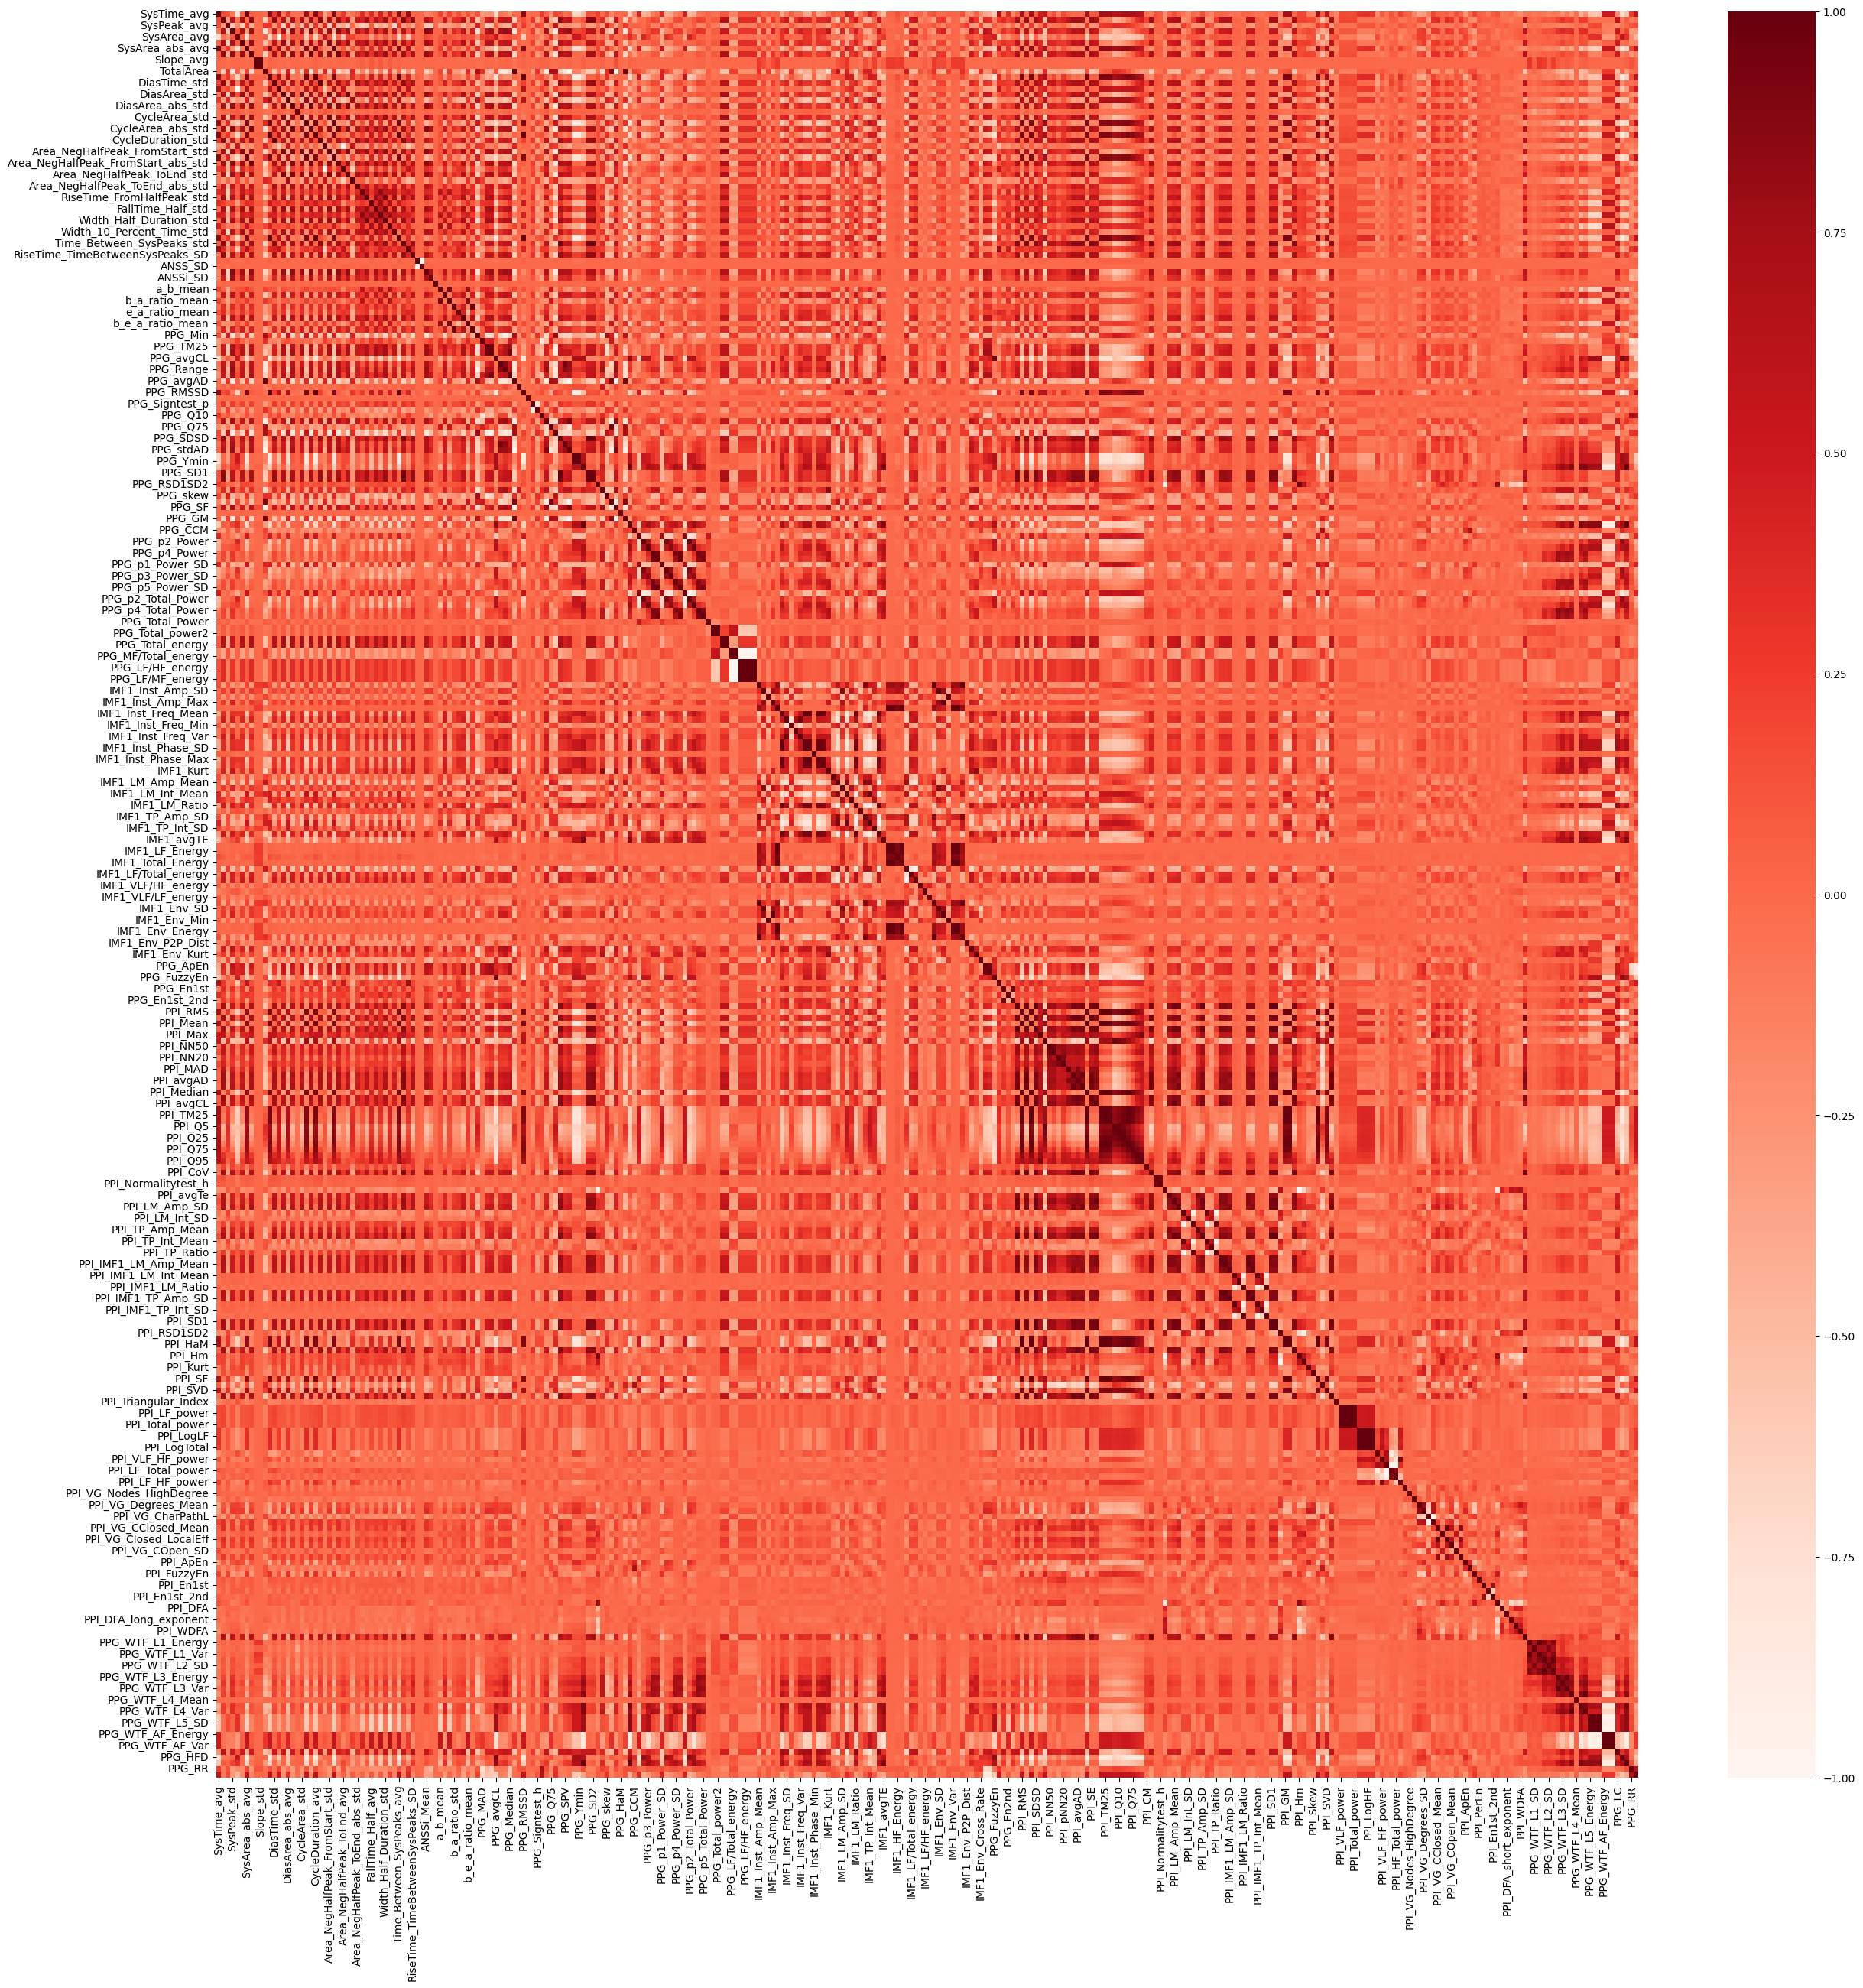

In [3]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [4]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [5]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [6]:
# Check NaNs

nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_VG_Degrees_S

In [7]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


# Prepare X and y

In [8]:
# Load subjects
df_subjects = pd.read_csv("path_to_subjects_df.csv") # NB! The subjects df has to have as many rows as 3_stages df

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['3_stages', 'SubjectID'], axis=1)

# Convert labels and subjects for later use
y = df_revised['3_stages']
groups = df_revised['SubjectID']


# SMOTE balancing

In [9]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]

        # Impute missing values
        X_g = imputer.fit_transform(X_g)

        smote = SMOTE(random_state=42)
        X_resampled_g, y_resampled_g = smote.fit_resample(X_g, y_g)
        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))  # Convert back to DataFrame to maintain feature names
        resampled_y.append(pd.Series(y_resampled_g))  # Convert back to Series
        resampled_groups.extend([group] * len(y_resampled_g))  # Extend the groups array with the current group repeated for the resampled size

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)

# Usage of the function with sample data
# Assume X, y, and groups are already defined and appropriately prepared
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)

In [10]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

0    55875
1    55875
2    55875
Name: 3_stages, dtype: int64


# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(random_state=42))
sfm.fit(X_resampled, y_resampled)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X_resampled.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysTime_avg', 'SysPeak_avg', 'SysArea_avg', 'DiasArea_avg',
       'DiasArea_std', 'DiasArea_abs_avg', 'CycleArea_std',
       'Area_NegHalfPeak_FromStart_avg', 'Area_NegHalfPeak_ToEnd_avg',
       'Area_NegHalfPeak_ToEnd_abs_avg', 'Area_NegHalfPeak_ToEnd_abs_std',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_avg',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'RiseTime_TimeBetweenSysPeaks_Mean',
       'RiseTime_TimeBetweenSysPeaks_SD', 'a_b_mean', 'a_b_std',
       'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std',
       'b_e_a_ratio_mean', 'PPG_Min', 'PPG_MAD', 'PPG_TM25', 'PPG_TM50',
       'PPG_Median', 'PPG_Q10', 'PPG_Q25', 'PPG_Q75', 'PPG_Q90', 'PPG_skew',
       'PPG_p4_Power', 'PPG_p4_Power_SD', 'PPG_p2_Total_Power',
       'PPG_p4_Total_Power', 'IMF1_Inst_Freq_Mean', 'IMF1_TP_Int_SD',
    

In [ ]:
X_selected = X_resampled[selected_features]
X_selected

,SysTime_avg,SysPeak_avg,SysArea_avg,DiasArea_avg,DiasArea_std,DiasArea_abs_avg,CycleArea_std,Area_NegHalfPeak_FromStart_avg,Area_NegHalfPeak_ToEnd_avg,Area_NegHalfPeak_ToEnd_abs_avg,...,PPI_PerEn,PPI_En1st,PPI_En2nd,PPI_HFD,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_LC,PPG_RR,PPG_DET
0,0.243075,2.051287,-1.285312,1.261417,20.293817,0.259398,14.887894,17.410490,-15.377866,0.122107,...,0.985228,0.978870,1.000000,1.840314,1.041127,73.786172,0.544357,56.679685,0.103262,0.916861
1,0.343277,1.927268,2.661957,-2.347344,27.929675,0.350208,33.482002,23.818025,-20.749097,0.224424,...,0.992267,0.996317,0.975119,1.670130,1.191702,124.451367,0.706797,59.669821,0.100278,0.961463
2,0.274200,2.242864,0.956881,-0.729983,35.908480,0.321099,39.961905,20.078857,-20.758618,0.163108,...,0.999526,0.998001,0.999473,1.935544,0.566286,47.301892,0.435842,61.623213,0.070013,0.889709
3,0.437240,2.824896,-1.905432,2.499454,29.642914,0.399883,33.056040,22.102188,-21.490199,0.175081,...,0.994030,0.998364,0.970951,1.842306,0.691065,357.419869,1.197743,62.408353,0.075477,0.864056
4,0.274282,2.913433,1.484555,-1.118548,11.035044,0.390905,21.932653,25.067343,-23.335804,0.199192,...,0.959687,0.918296,0.988699,1.902181,1.272573,51.561563,0.455048,56.876811,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167620,0.424667,2.827618,2.902055,-1.999603,14.335922,0.454537,13.777609,29.309622,-26.902867,0.249889,...,0.986746,0.989795,0.962894,2.031627,0.845284,15.215948,0.245013,50.339559,0.080215,0.937407
167621,0.371237,2.889330,1.789559,-1.457584,17.023594,0.512609,16.537379,31.035646,-29.331855,0.281098,...,0.997490,0.998741,1.000000,1.990526,0.686186,31.919652,0.357988,54.706959,0.085117,0.937638
167622,0.383411,2.823317,1.833803,-1.737019,18.428211,0.502359,17.402202,30.195387,-28.819887,0.264468,...,0.991619,0.997154,0.997079,2.066919,0.660761,29.323510,0.340280,54.055745,0.075563,0.925048
167623,0.323889,2.806529,3.485356,-3.579545,13.850740,0.478401,13.665608,30.041671,-28.693363,0.277749,...,0.976270,0.995935,0.990027,2.048062,0.609137,32.537337,0.361148,54.595495,0.077418,0.918737


# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}


class VerboseGroupKFold(GroupKFold):
    def __init__(self, n_splits=3, verbose=0):
        super().__init__(n_splits)
        self.verbose = verbose

    def split(self, X, y=None, groups=None):
        for fold, (train_index, test_index) in enumerate(super().split(X, y, groups)):
            if self.verbose > 0:
                print(f"Starting fold {fold + 1}")
            yield train_index, test_index
            if self.verbose > 0:
                print(f"Finished fold {fold + 1}")

# Then use VerboseGroupKFold in your RandomizedSearchCV
verbose_gkf = VerboseGroupKFold(n_splits=3, verbose=1)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=verbose_gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

In [13]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)


# Define the parameter grid based on the results of random search
param_grid_rf = {
    'classifier__bootstrap': [False, True],
    'classifier__max_depth': [10, 15],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [4, 6, 8],
    'classifier__min_samples_split': [6, 7, 8],
    'classifier__n_estimators': [464, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y_resampled, groups=groups_resampled),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y_resampled)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 500}
Best score:  0.34033674789414076


# Model Training

## 5-fold CV

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Output the best parameters and score from grid search
best_params = grid_search_rf.best_params_

# Extract best parameters for the RandomForestClassifier
best_rf_params = {k.replace('classifier__', ''): v for k, v in best_params.items() if 'classifier__' in k}

# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(**best_rf_params, random_state=42)


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 5 for a 5-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)


Test set distribution: 0    11275
1    11275
2    11275
Name: 3_stages, dtype: int64
Test set distribution: 0    10915
1    10915
2    10915
Name: 3_stages, dtype: int64
Test set distribution: 0    11233
1    11233
2    11233
Name: 3_stages, dtype: int64
Test set distribution: 0    11228
1    11228
2    11228
Name: 3_stages, dtype: int64
Test set distribution: 0    11224
1    11224
2    11224
Name: 3_stages, dtype: int64
Accuracy       0.569017
Sensitivity    0.569017
Specificity    0.784509
Precision      0.569017
F1 Score       0.569017
MCC            0.362843
dtype: float64
Accuracy       0.019993
Sensitivity    0.019993
Specificity    0.009996
Precision      0.019993
F1 Score       0.019993
MCC            0.031332
dtype: float64
Final Confusion Matrix:
 [[24472 15062 16341]
 [ 7253 45212  3410]
 [10577 19594 25704]]


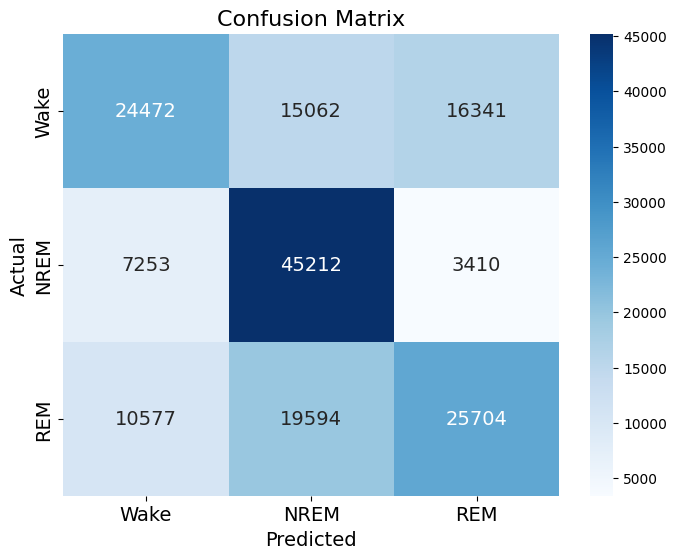

In [15]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'NREM','REM'], yticklabels=['Wake', 'NREM','REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature Importance

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [18]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv5 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2],
})

# Adding a column for the overall importance (mean)
importances_df_cv5['Overall Importance (Mean)'] = importances_df_cv5[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv5

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Overall Importance (Mean)
0,SysTime_avg,0.013383,0.009863,0.015183,0.012810
1,SysPeak_avg,0.012326,0.007209,0.011228,0.010254
2,SysArea_avg,0.012735,0.009025,0.013649,0.011803
3,DiasArea_avg,0.011940,0.008440,0.012810,0.011063
4,DiasArea_std,0.010298,0.007499,0.009250,0.009016
...,...,...,...,...,...
67,PPG_WTF_L4_Energy,0.015006,0.006311,0.011530,0.010949
68,PPG_WTF_L4_SD,0.013682,0.005996,0.011503,0.010394
69,PPG_LC,0.026682,0.008581,0.019756,0.018340
70,PPG_RR,0.010774,0.007334,0.009827,0.009312


## 10-fold CV

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)


Test set distribution: 0    5760
1    5760
2    5760
Name: 3_stages, dtype: int64
Test set distribution: 0    5772
1    5772
2    5772
Name: 3_stages, dtype: int64
Test set distribution: 0    5462
1    5462
2    5462
Name: 3_stages, dtype: int64
Test set distribution: 0    5469
1    5469
2    5469
Name: 3_stages, dtype: int64
Test set distribution: 0    5811
1    5811
2    5811
Name: 3_stages, dtype: int64
Test set distribution: 0    5451
1    5451
2    5451
Name: 3_stages, dtype: int64
Test set distribution: 0    5464
1    5464
2    5464
Name: 3_stages, dtype: int64
Test set distribution: 0    5462
1    5462
2    5462
Name: 3_stages, dtype: int64
Test set distribution: 0    5456
1    5456
2    5456
Name: 3_stages, dtype: int64
Test set distribution: 0    5768
1    5768
2    5768
Name: 3_stages, dtype: int64
Accuracy       0.571373
Sensitivity    0.571373
Specificity    0.785686
Precision      0.571373
F1 Score       0.571373
MCC            0.368259
dtype: float64
Accuracy       0.0273

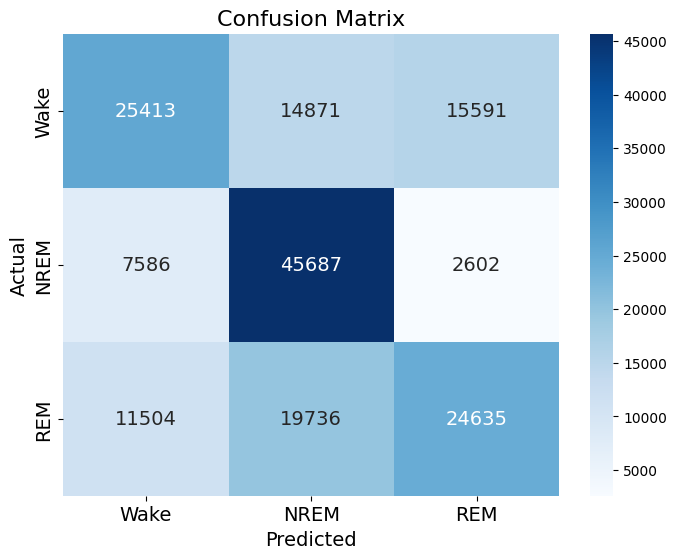

In [20]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'NREM','REM'], yticklabels=['Wake', 'NREM','REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict



# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Define the number of classes
n_classes = 3

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv10 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [22]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv10 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv10[0],
    'Class 1 Importances': average_importances_cv10[1],
    'Class 2 Importances': average_importances_cv10[2],
})

# Adding a column for the overall importance (mean)
importances_df_cv10['Overall Importance (Mean)'] = importances_df_cv10[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv10

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Overall Importance (Mean)
0,SysTime_avg,0.013382,0.009886,0.015277,0.012849
1,SysPeak_avg,0.011950,0.007043,0.011215,0.010069
2,SysArea_avg,0.012512,0.008907,0.013129,0.011516
3,DiasArea_avg,0.011705,0.008345,0.012373,0.010808
4,DiasArea_std,0.010122,0.007295,0.009102,0.008840
...,...,...,...,...,...
67,PPG_WTF_L4_Energy,0.014755,0.006136,0.011385,0.010759
68,PPG_WTF_L4_SD,0.013726,0.005881,0.011421,0.010343
69,PPG_LC,0.028054,0.008358,0.020147,0.018853
70,PPG_RR,0.010800,0.007052,0.009741,0.009198


## 20-fold CV

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)


Test set distribution: 0    3057
1    3057
2    3057
Name: 3_stages, dtype: int64
Test set distribution: 0    3031
1    3031
2    3031
Name: 3_stages, dtype: int64
Test set distribution: 0    2709
1    2709
2    2709
Name: 3_stages, dtype: int64
Test set distribution: 0    3080
1    3080
2    3080
Name: 3_stages, dtype: int64
Test set distribution: 0    2719
1    2719
2    2719
Name: 3_stages, dtype: int64
Test set distribution: 0    2729
1    2729
2    2729
Name: 3_stages, dtype: int64
Test set distribution: 0    2713
1    2713
2    2713
Name: 3_stages, dtype: int64
Test set distribution: 0    2738
1    2738
2    2738
Name: 3_stages, dtype: int64
Test set distribution: 0    3018
1    3018
2    3018
Name: 3_stages, dtype: int64
Test set distribution: 0    2717
1    2717
2    2717
Name: 3_stages, dtype: int64
Test set distribution: 0    2761
1    2761
2    2761
Name: 3_stages, dtype: int64
Test set distribution: 0    2730
1    2730
2    2730
Name: 3_stages, dtype: int64
Test set distrib

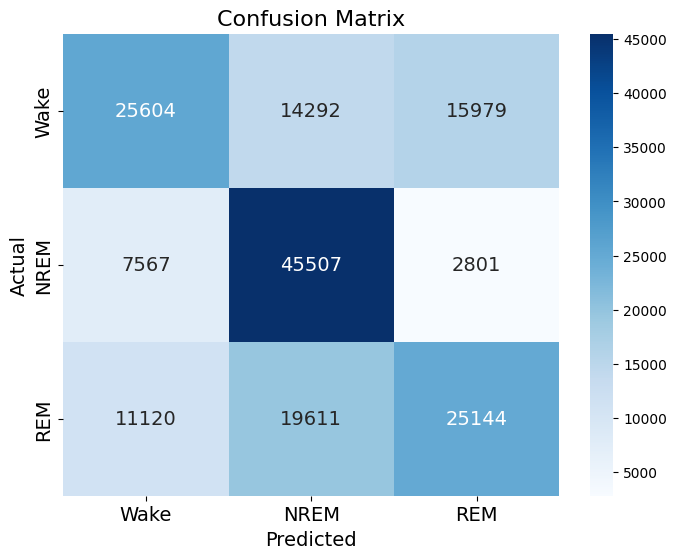

In [24]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'NREM','REM'], yticklabels=['Wake', 'NREM','REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv20 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [26]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv20 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv20[0],
    'Class 1 Importances': average_importances_cv20[1],
    'Class 2 Importances': average_importances_cv20[2],
})

# Adding a column for the overall importance (mean)
importances_df_cv20['Overall Importance (Mean)'] = importances_df_cv20[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv20


,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Overall Importance (Mean)
0,SysTime_avg,0.013260,0.009761,0.015120,0.012714
1,SysPeak_avg,0.011838,0.006957,0.011070,0.009955
2,SysArea_avg,0.012466,0.008864,0.013115,0.011482
3,DiasArea_avg,0.011700,0.008166,0.012301,0.010722
4,DiasArea_std,0.010191,0.007185,0.009000,0.008792
...,...,...,...,...,...
67,PPG_WTF_L4_Energy,0.014811,0.006019,0.011323,0.010718
68,PPG_WTF_L4_SD,0.013743,0.005799,0.011418,0.010320
69,PPG_LC,0.028365,0.008334,0.020303,0.019001
70,PPG_RR,0.010889,0.006998,0.009768,0.009218


# Feature importances

In [27]:
# Assuming importances_df_cv10, importances_df_cv5, importances_df_cv20 are already defined
# Step 1: Merge the dataframes on the 'Feature' column
merged_df = pd.merge(importances_df_cv10, importances_df_cv5, on='Feature', suffixes=('_cv10', '_cv5'))
merged_df = pd.merge(merged_df, importances_df_cv20, on='Feature')

# Step 2: Calculate the average importance for each class across the three validation methods
merged_df['Class 0 Average'] = merged_df[['Class 0 Importances_cv10', 'Class 0 Importances_cv5', 'Class 0 Importances']].mean(axis=1)
merged_df['Class 1 Average'] = merged_df[['Class 1 Importances_cv10', 'Class 1 Importances_cv5', 'Class 1 Importances']].mean(axis=1)
merged_df['Class 2 Average'] = merged_df[['Class 2 Importances_cv10', 'Class 2 Importances_cv5', 'Class 2 Importances']].mean(axis=1)


# Step 3: Calculate the overall mean importance from the averages of each class
merged_df['Overall Importance (Mean)'] = merged_df[['Class 0 Average', 'Class 1 Average', 'Class 2 Average']].mean(axis=1)

# Optionally, create a DataFrame to view or export just the features and their importances
final_df = merged_df[['Feature', 'Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Overall Importance (Mean)']]
final_df

,Feature,Class 0 Average,Class 1 Average,Class 2 Average,Overall Importance (Mean)
0,SysTime_avg,0.013342,0.009837,0.015194,0.012791
1,SysPeak_avg,0.012038,0.007070,0.011171,0.010093
2,SysArea_avg,0.012571,0.008932,0.013298,0.011600
3,DiasArea_avg,0.011782,0.008317,0.012495,0.010864
4,DiasArea_std,0.010204,0.007326,0.009117,0.008882
...,...,...,...,...,...
67,PPG_WTF_L4_Energy,0.014857,0.006155,0.011413,0.010808
68,PPG_WTF_L4_SD,0.013717,0.005892,0.011447,0.010352
69,PPG_LC,0.027700,0.008424,0.020069,0.018731
70,PPG_RR,0.010821,0.007128,0.009779,0.009243


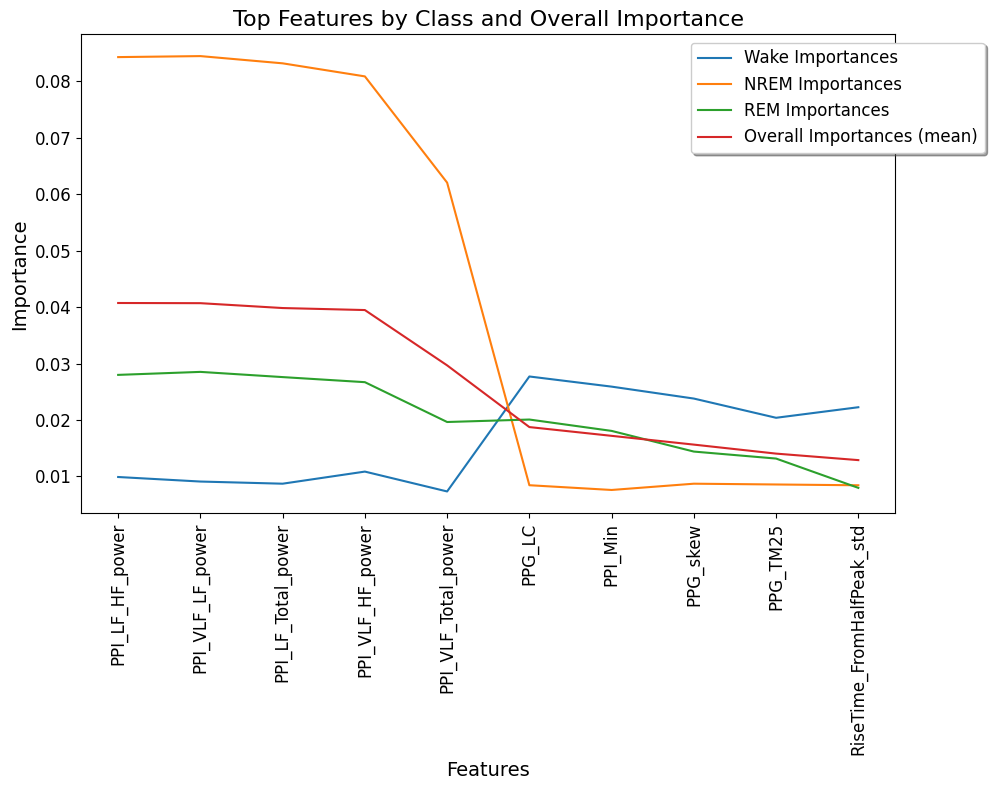

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 for each class
top_class_0 = final_df.nlargest(5, 'Class 0 Average')['Feature']
top_class_1 = final_df.nlargest(5, 'Class 1 Average')['Feature']
top_class_2 = final_df.nlargest(5, 'Class 2 Average')['Feature']
top_overall = final_df.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = final_df[final_df['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Average' else label for label in labels]
new_labels = ['NREM Importances' if label == 'Class 1 Average' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 2 Average' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()


In [29]:
# Select the top 5 features for each class and overall
top_features_class_0 = final_df.nlargest(5, 'Class 0 Average')
top_features_class_1 = final_df.nlargest(5, 'Class 1 Average')
top_features_class_2 = final_df.nlargest(5, 'Class 2 Average')
top_features_overall = final_df.nlargest(5, 'Overall Importance (Mean)')

# Reset index to get the feature names in a column (if they are set as the index)
top_features_class_0 = top_features_class_0.reset_index()
top_features_class_1 = top_features_class_1.reset_index()
top_features_class_2 = top_features_class_2.reset_index()
top_features_overall = top_features_overall.reset_index()

# Combine the DataFrames and melt for plotting
top_features_combined = pd.concat([
    top_features_class_0.assign(Class='Wake').melt(id_vars=['Feature', 'Class'], value_vars=['Class 0 Average'], value_name='Importance'),
    top_features_class_1.assign(Class='NREM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 1 Average'], value_name='Importance'),
    top_features_class_2.assign(Class='REM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 2 Average'], value_name='Importance'),
    top_features_overall.assign(Class='Overall').melt(id_vars=['Feature', 'Class'], value_vars=['Overall Importance (Mean)'], value_name='Importance')
])


# Map overall importance to each feature
overall_importance_map = top_features_overall.set_index('Feature')['Overall Importance (Mean)'].to_dict()
top_features_combined['Overall Importance (Mean)'] = top_features_combined['Feature'].map(overall_importance_map)

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order
top_features_combined_sorted = top_features_combined.sort_values(by='Overall Importance (Mean)', ascending=False)

# Print sorted DataFrame
top_features_combined_sorted



,Feature,Class,variable,Importance,Overall Importance (Mean)
1,PPI_LF_HF_power,NREM,Class 1 Average,0.084317,0.040727
1,PPI_LF_HF_power,REM,Class 2 Average,0.027984,0.040727
0,PPI_LF_HF_power,Overall,Overall Importance (Mean),0.040727,0.040727
0,PPI_VLF_LF_power,NREM,Class 1 Average,0.084495,0.040695
0,PPI_VLF_LF_power,REM,Class 2 Average,0.028515,0.040695
1,PPI_VLF_LF_power,Overall,Overall Importance (Mean),0.040695,0.040695
2,PPI_LF_Total_power,NREM,Class 1 Average,0.083213,0.039833
2,PPI_LF_Total_power,REM,Class 2 Average,0.027592,0.039833
2,PPI_LF_Total_power,Overall,Overall Importance (Mean),0.039833,0.039833
3,PPI_VLF_HF_power,NREM,Class 1 Average,0.080898,0.039476


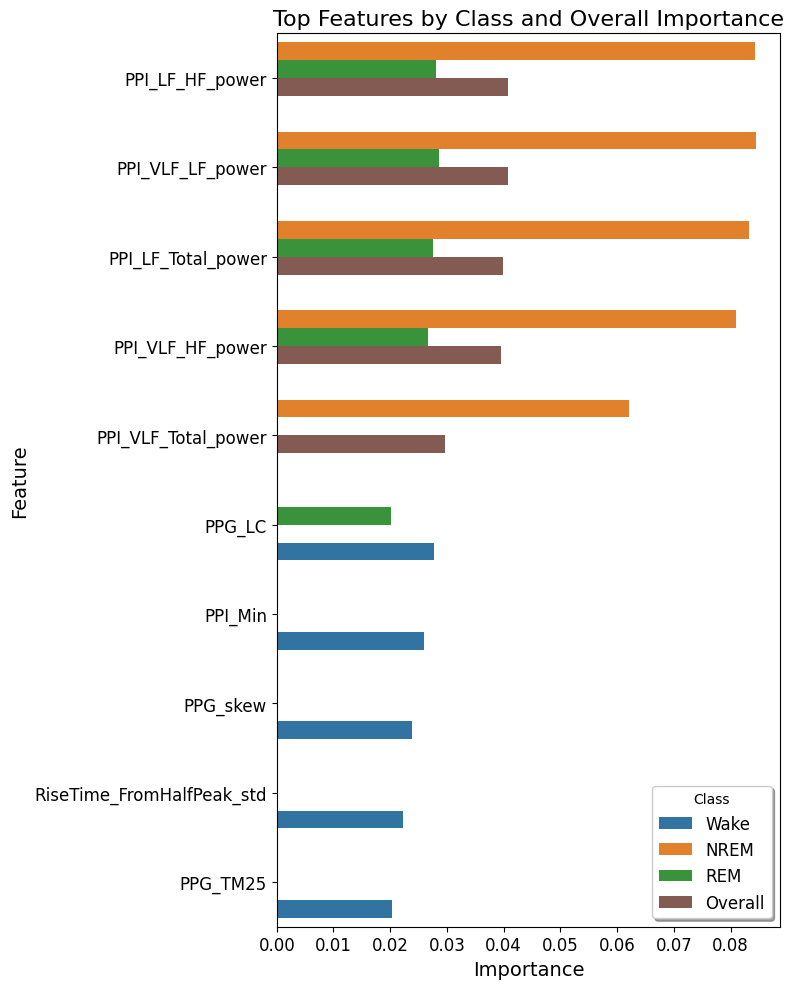

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with the combined DataFrame
# Define the custom palette using seaborn's "deep" palette
deep_palette = sns.color_palette()
custom_palette = {
    'Wake': deep_palette[0],  # Blue
    'NREM': deep_palette[1],  # Orange
    'REM': deep_palette[2],  # Green
    'Overall': deep_palette[5]  # Purple
}

plt.figure(figsize=(8, 10))
barplot = sns.barplot(
    data=top_features_combined_sorted,
    x='Importance',
    y='Feature',
    hue='Class',
    palette=custom_palette
)
# Improve the aesthetics and legibility of the plot
plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend to match the desired order and colors
handles, labels = barplot.get_legend_handles_labels()
desired_order = ['Wake', 'NREM', 'REM', 'Overall']
ordered_handles = [handles[labels.index(lbl)] for lbl in desired_order]

# Create a new legend with the desired order and colors
plt.legend(ordered_handles, desired_order, title='Class', fontsize=12, frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

In [31]:
feature_names = top_features_combined_sorted['Feature'].unique()

In [32]:
feature_names

array(['PPI_LF_HF_power', 'PPI_VLF_LF_power', 'PPI_LF_Total_power',
       'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPG_LC', 'PPI_Min',
       'PPG_skew', 'RiseTime_FromHalfPeak_std', 'PPG_TM25'], dtype=object)

In [33]:
top_features = X_resampled[feature_names]

C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_27092\764402667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = y_resampled  # Add the class labels


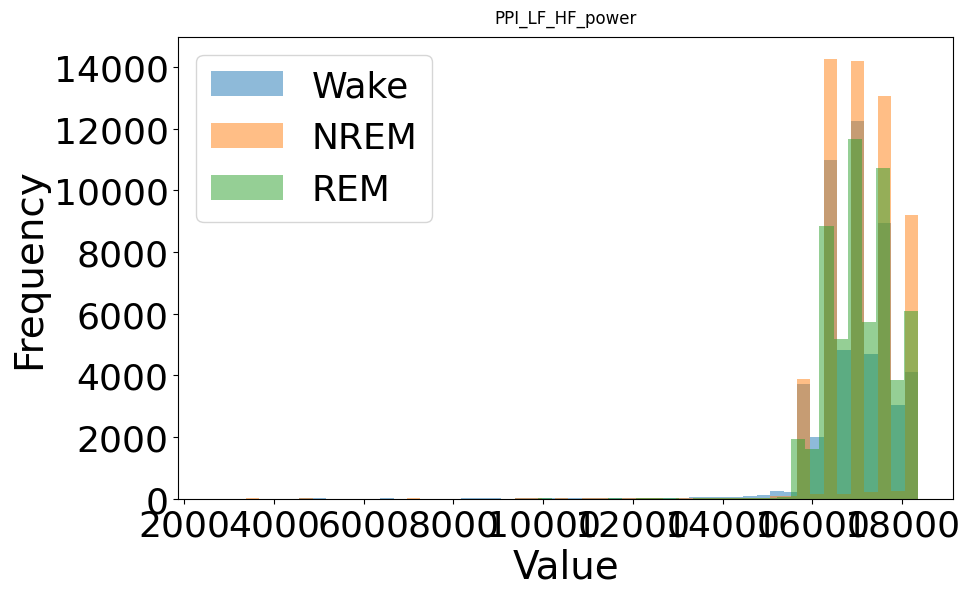

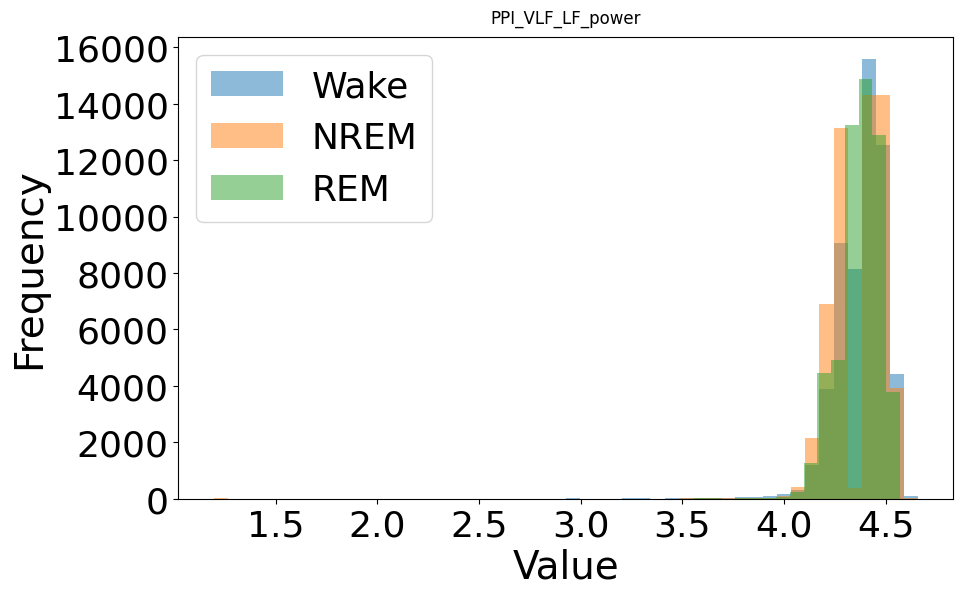

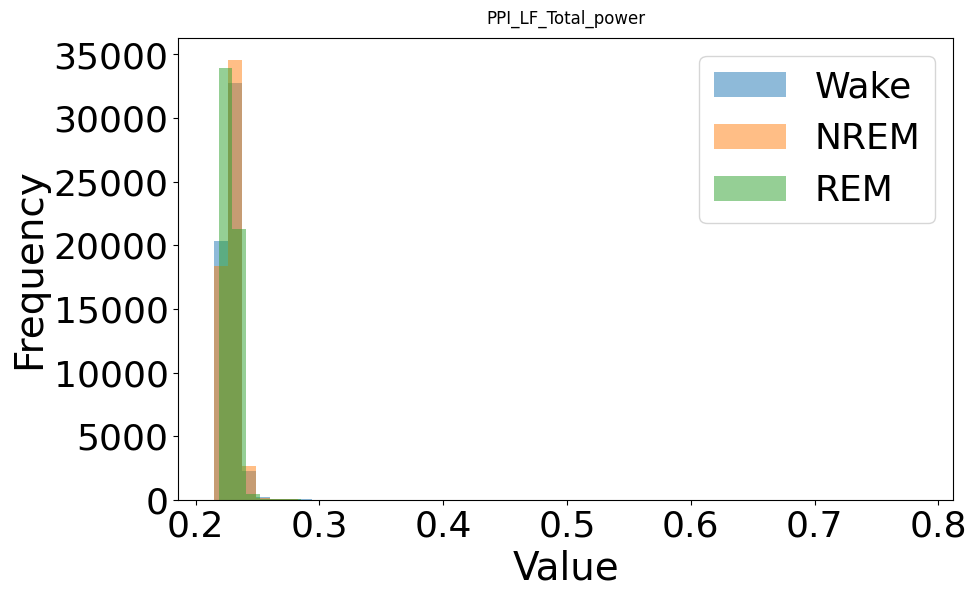

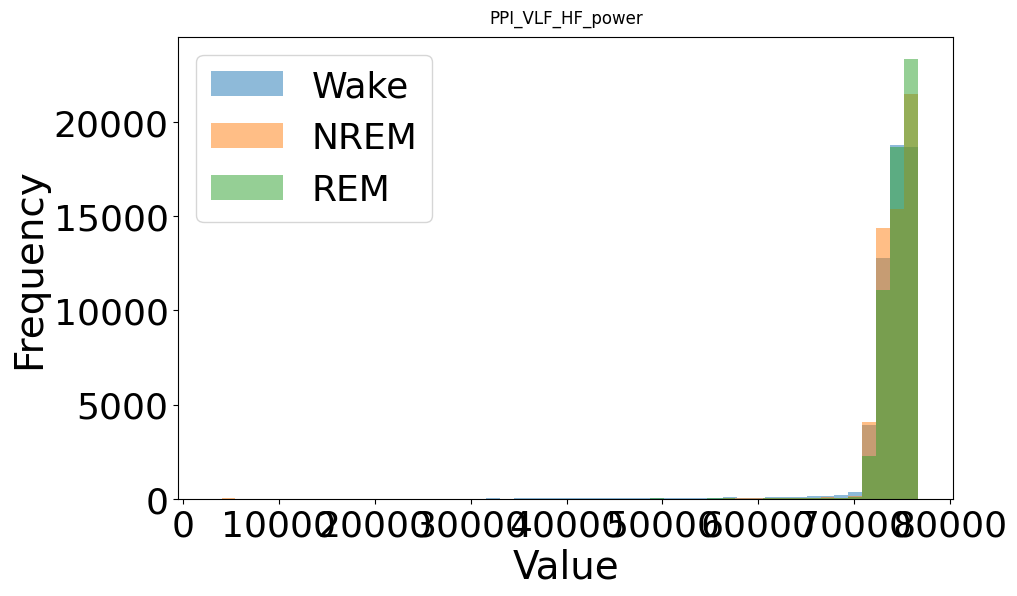

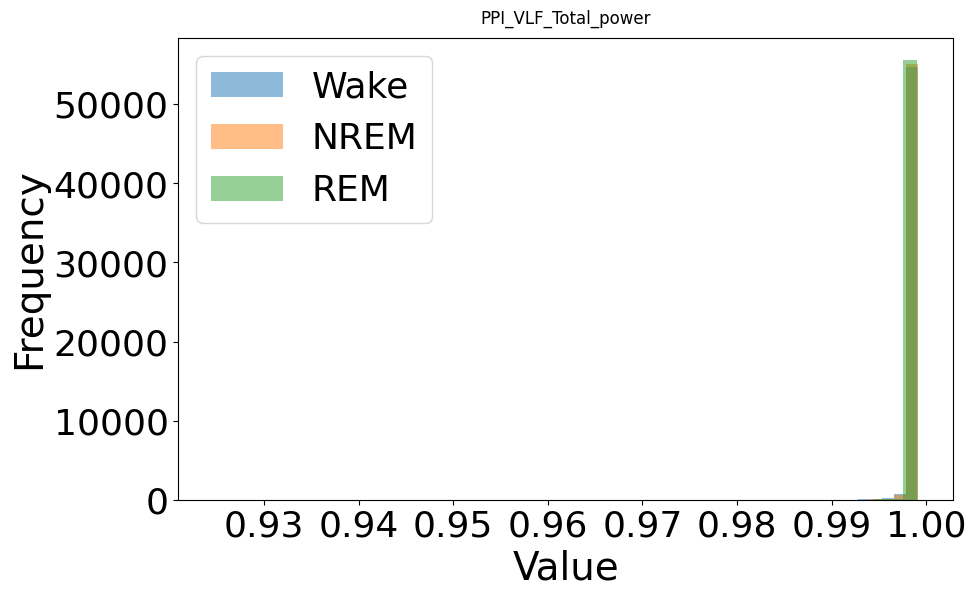

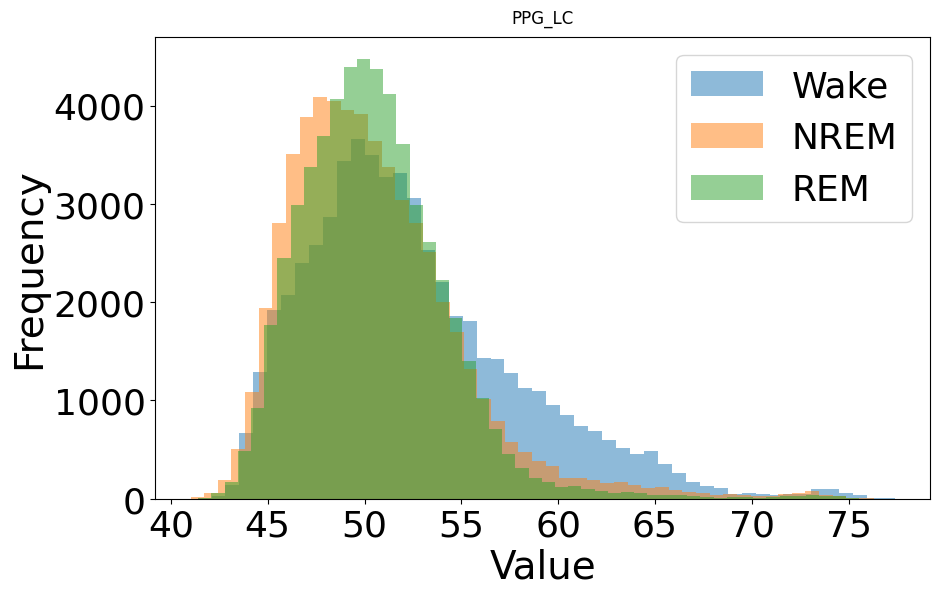

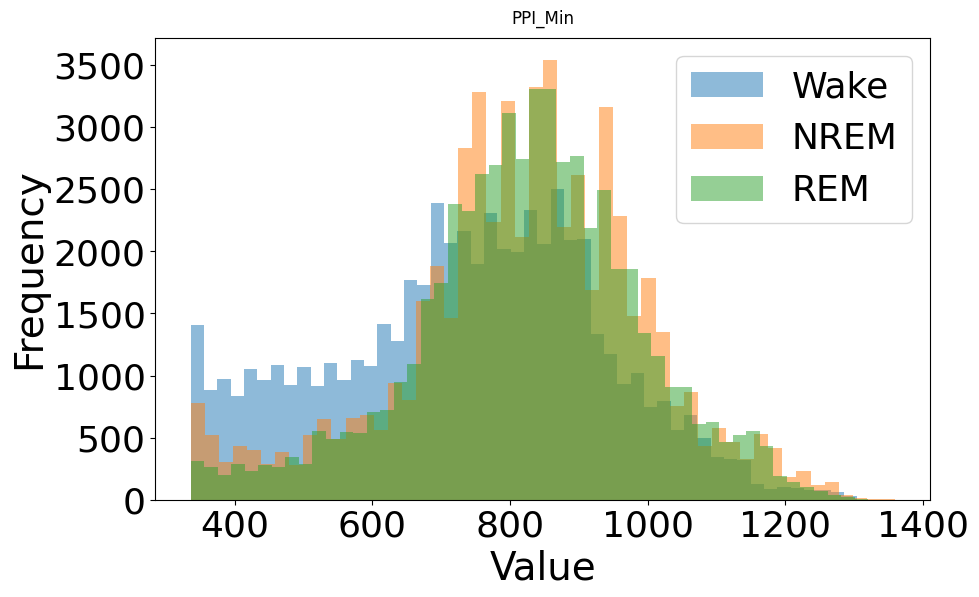

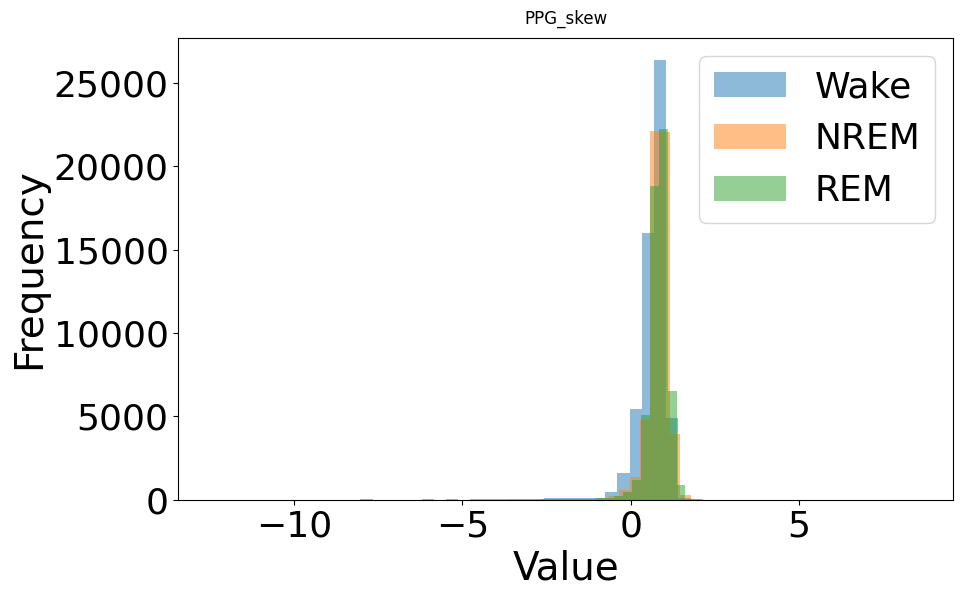

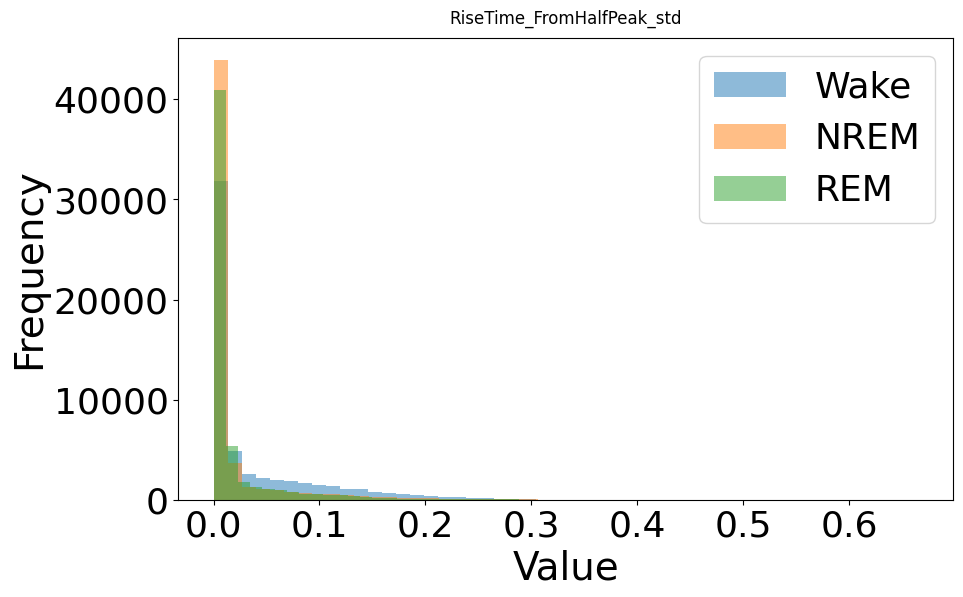

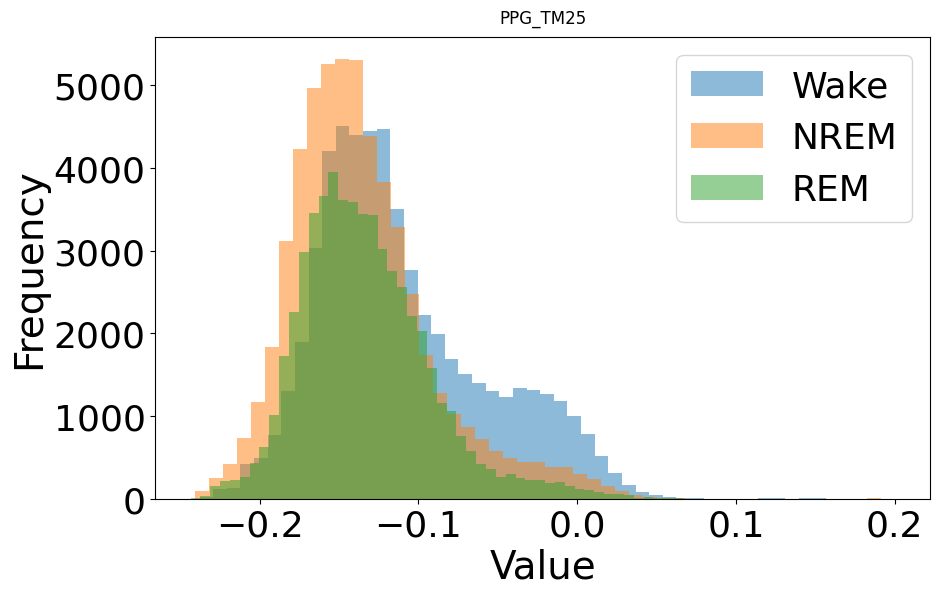

In [40]:
# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "NREM",
    2: "REM"
}

# Plot histograms for each feature
# Assuming 'top_features' DataFrame and 'y_resampled' Series are already defined
top_features['class'] = y_resampled  # Add the class labels

# Exclude the 'class' column when getting feature names
feature_names = top_features.drop(columns='class').columns

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Get unique class values from the 'class' column
    for class_value in np.unique(top_features['class']):
        # Subset the data for the current class
        subset = top_features[top_features['class'] == class_value]
        # Plot histogram and use the class_labels dictionary to get the correct label
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'{feature}', pad = 10)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.yticks (fontsize = 26)
    plt.xticks (fontsize = 26)
    plt.legend(fontsize = 26)
    plt.show()


C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_27092\3837078349.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = top_features['class'].map(class_mapping)


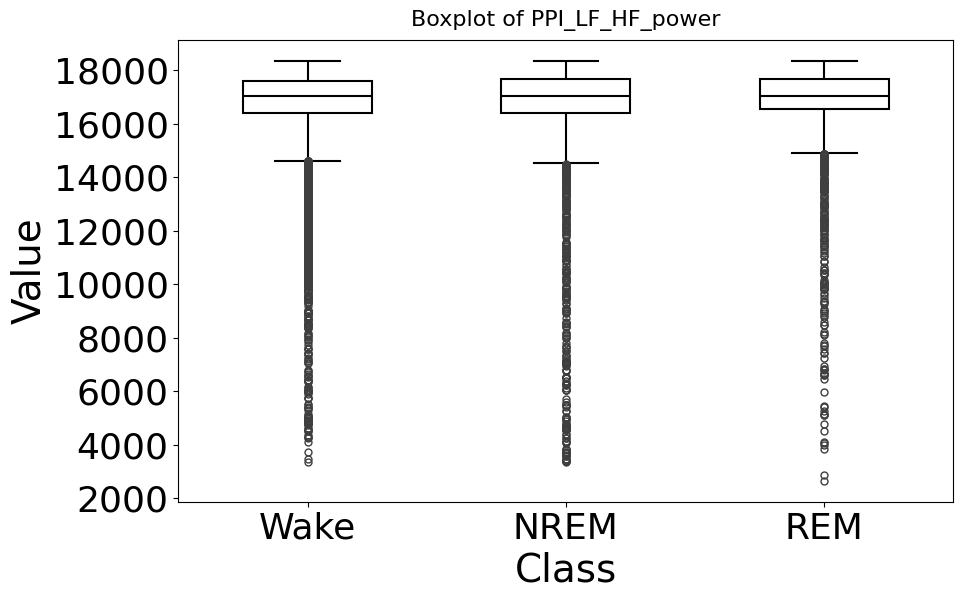

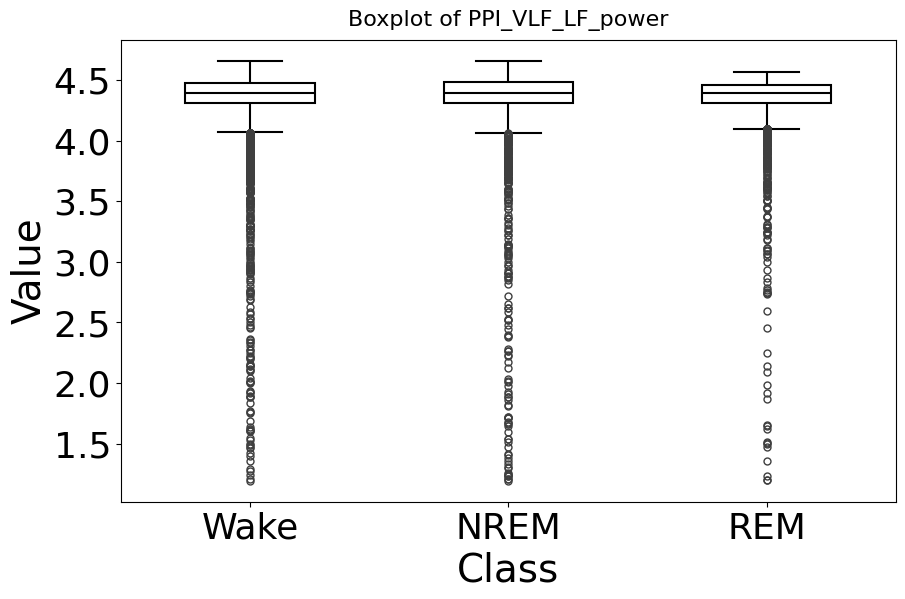

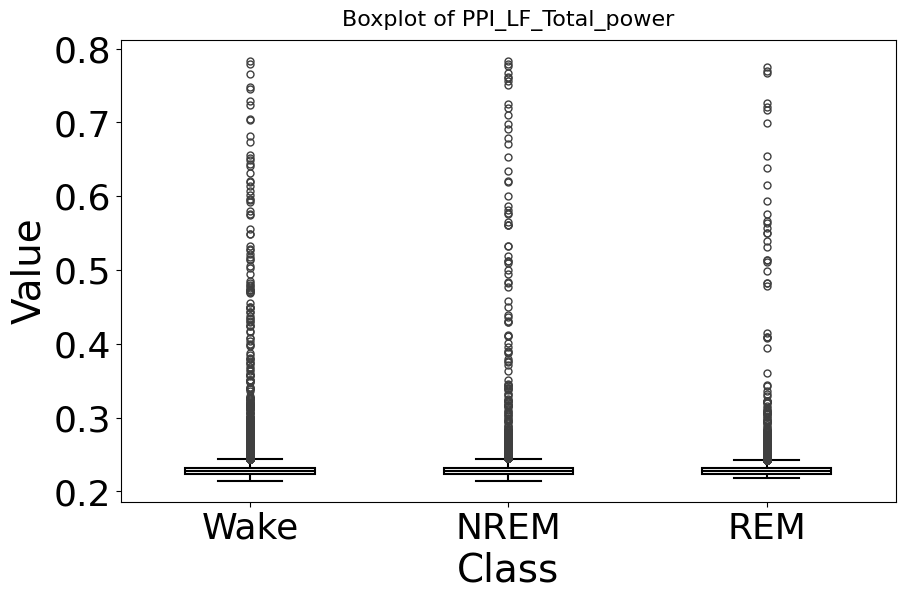

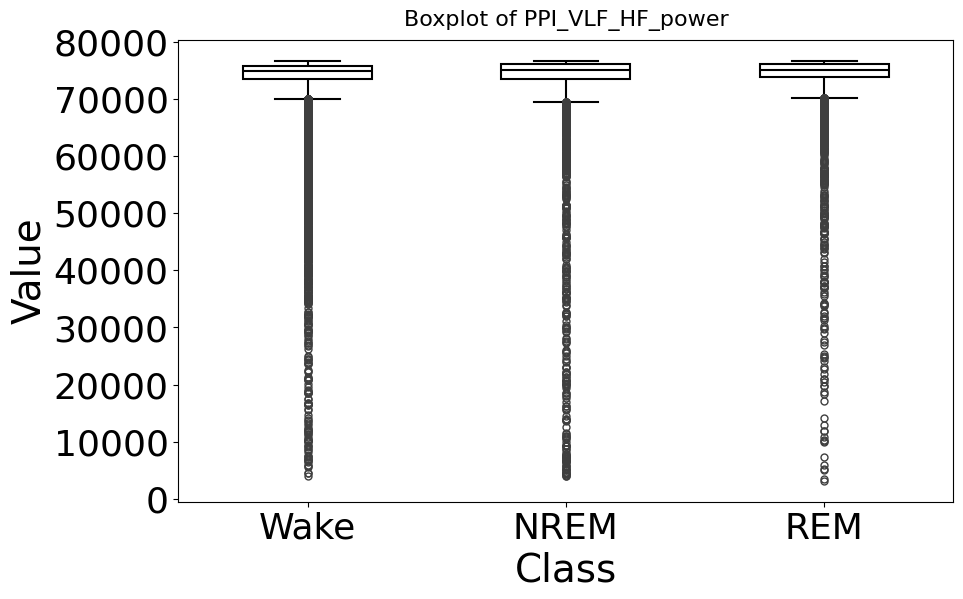

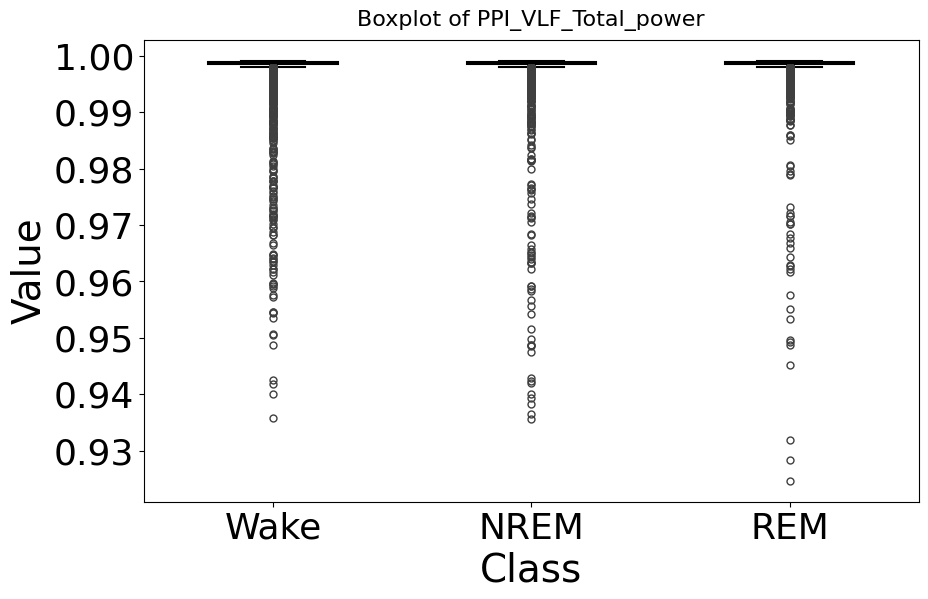

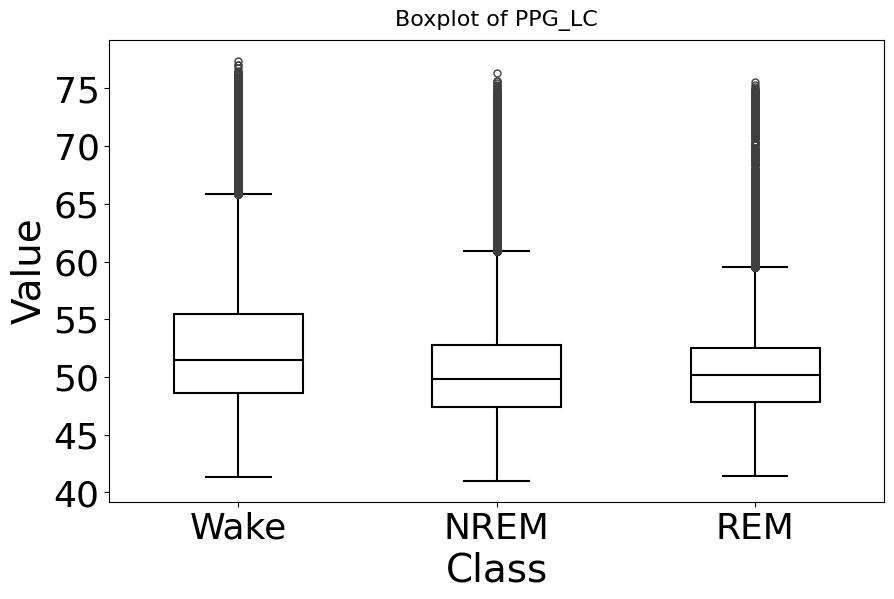

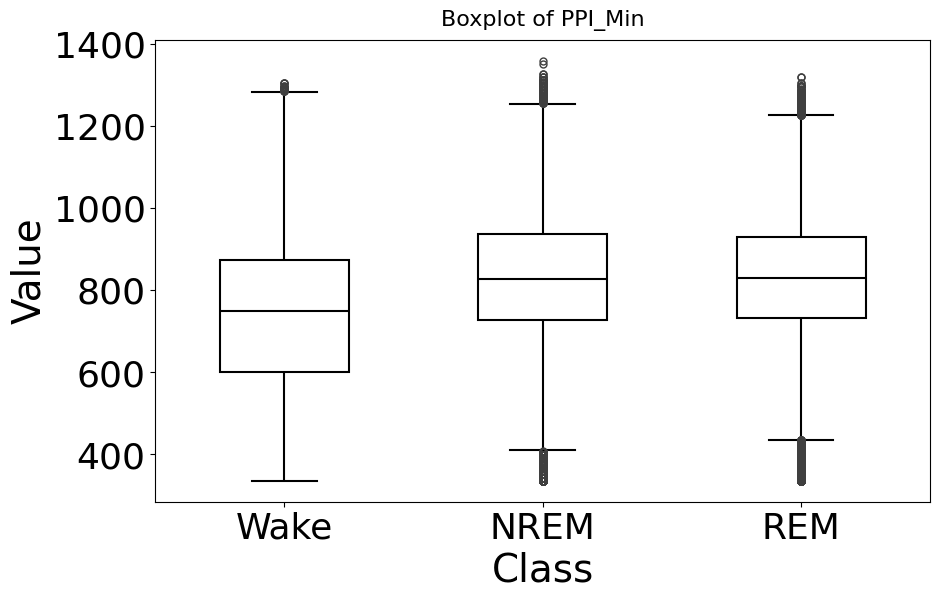

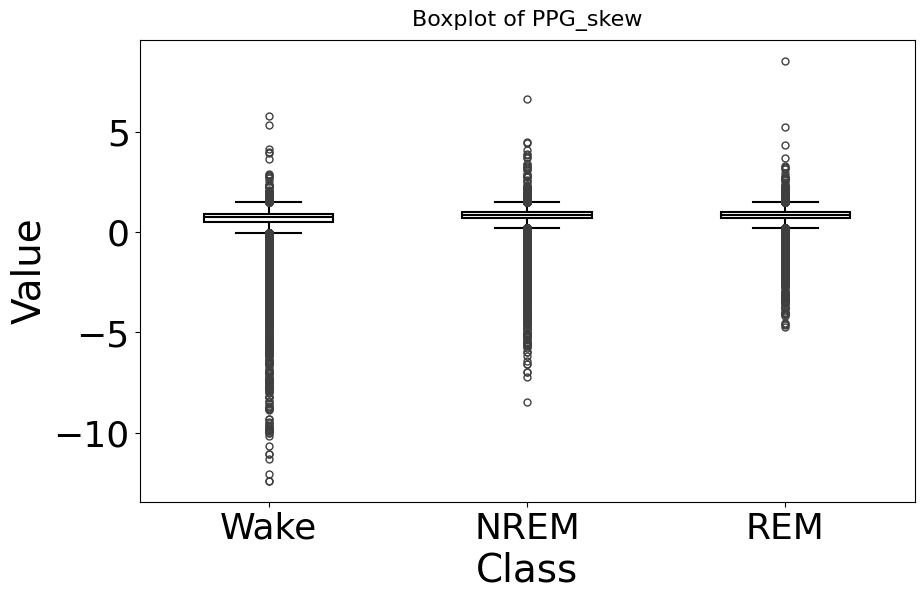

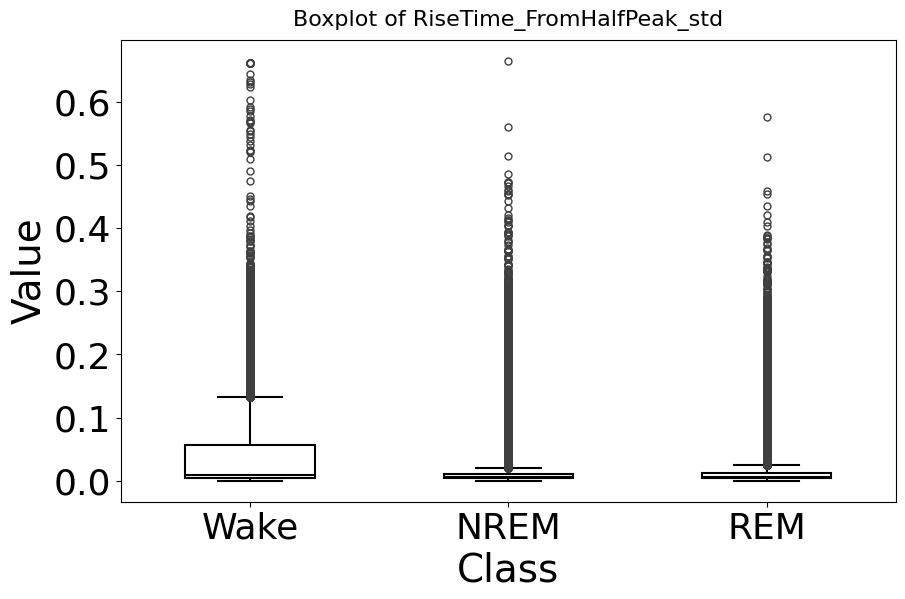

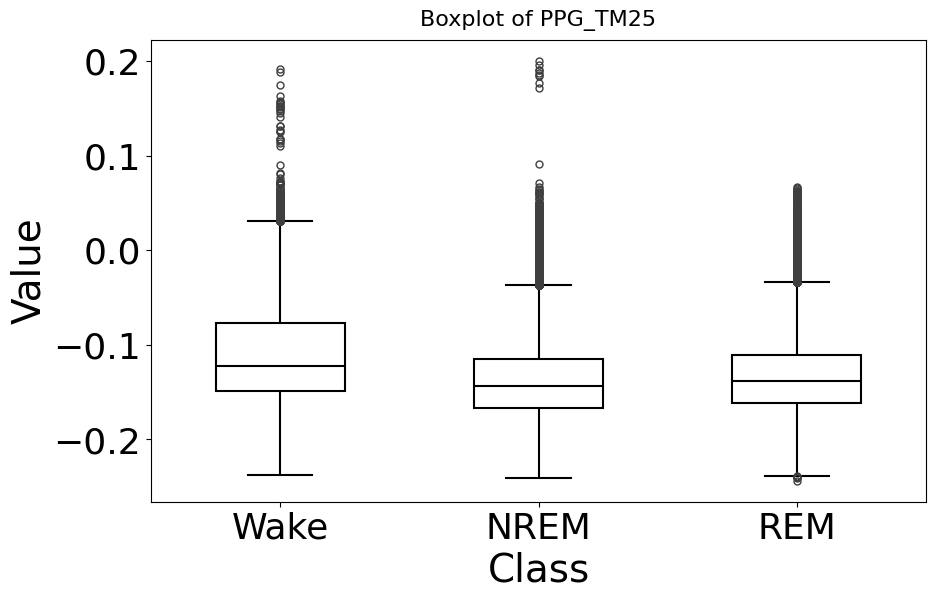

In [39]:
# First, map your 'class' column to the desired string labels
# Create a dictionary to map the class values to sleep stages
class_mapping = {0: "Wake", 1: "NREM", 2:"REM"}

# Replace the numerical class labels in your DataFrame with the string labels
top_features['class'] = top_features['class'].map(class_mapping)

feature_names = top_features.drop(columns='class').columns  # assuming 'class' column exists

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot
    sns.boxplot(x='class', y=feature, data=top_features,
                width=0.5,
                fliersize=5,
                linewidth=1.5,
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},
                whiskerprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'color': 'black'})

    plt.title(f'Boxplot of {feature}', fontsize=16, pad = 10)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)

    # Set x-ticks labels according to the class labels
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    plt.show()
